# Q11

GoKart , a regional delivery service company provides different types of package delivery service. 
An analyst wants to estimate the cost of shipping a package as function of cargo type. 

Cost of 15 randomly chosen packages of approximately the same weight, shipped to almost similar distance, is provided in the file MLR_Q11_CourierService.csv 
File link: https://drive.google.com/drive/folders/1ILKastUTJWccxaxIpJpjqCJDpsMJ-oC8


Based on regression model, answer below questions:

    1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package.
    2) Provide interpretation for the regression coefficients. 
    3) Which cargo type is the costliest? Which one is least costly?
    4) How well does the regression fit the sample data? How can the goodness of fitness be improved?
    5) Predict the cost of shipping a package with semi-fragile cargo.

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("MLR_Q11_CourierService.csv")

df.head(2)

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0


In [7]:
df['CargType'].value_counts()

Semifragile    5
Durable        5
Fragile        5
Name: CargType, dtype: int64

In [6]:
# create dummy data for CargType
df_dummy = pd.get_dummies(df.drop('Shipment', axis=1), prefix="gp", 
                           columns=["CargType"], 
                           drop_first=False)
df_dummy.head()

,CosoShipment,gp_Durable,gp_Fragile,gp_Semifragile
0,84.0,0,0,1
1,24.0,1,0,0
2,165.6,0,1,0
3,133.2,0,1,0
4,120.0,0,0,1


In [8]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

In [11]:
reg_model = fit_lin_reg_with_intercept(X=df_dummy[["gp_Durable", "gp_Semifragile"]], Y=df_dummy[["CosoShipment"]])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:           CosoShipment   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Sun, 15 May 2022   Prob (F-statistic):           0.000132
Time:                        08:10:55   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            156.0000     12.903     12.

C:\Users\kumarmanglam.thakur\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


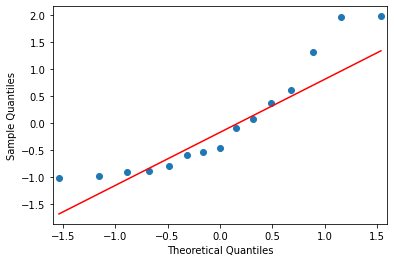

In [12]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

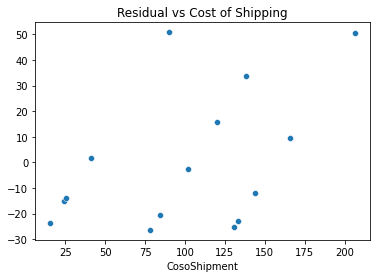

In [14]:
# Residual plot 
#residuals = reg_model.resid 
fig = sns.scatterplot(x=df_dummy["CosoShipment"], y=residuals)
fig.set_title("Residual vs Cost of Shipping")
plt.show()

### Answer
    1) Estimate the appropriate multiple linear regression equation to predict the cost of shipping a package.
       Cost of Shipment = 156.0000 - 116.8800* gp_Durable - 51.6000 * gp_Semifragile
    2) Provide interpretation for the regression coefficients. 
    In the regression, we have used Durable and Semi fragile categories. These two have negative coefficients, with durable having higher negative coefficient as compared to Semi fragile. This means that Fragile cargos are more expensive to ship(its part of intercept), followed by Semi Fragile and then Durable. 
    
    3) Which cargo type is the costliest? Which one is least costly?
    From the regression coefficients, we can say that Fragile is most expensive and Durable is least expensive.
    4) How well does the regression fit the sample data? How can the goodness of fitness be improved?
    We see R square value of 77.4%, which means that 77.4% variation in Cost of Shipping. This is descent goodness of fit. The fit can be further improved if we have more data or other variables e.g. size of the cargo, weight of the cargo, etc.
    5) Predict the cost of shipping a package with semi-fragile cargo.
    Using the regression equation, the cost is 156.0000 - 51.6000 = 104.4

In [15]:
156.0000 - 51.6000 

104.4